In [1]:
import pandas as pd

defender_data = pd.read_csv('data/LRD_data.csv')
defender_data.head()

/var/folders/4v/hcqt1p7s1859vr42874pyy8r0000gn/T/ipykernel_91173/3035438852.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,price_final,model_type,model_variant_final,ext_color_final,mileage_final,age,originality_final
0,49990.0,Land Rover Defender 90,90 Hard Top,Gray,0.000000e+00,33,Restored-Modified
1,91500.0,NAS 5-Speed,90 Soft Top,Green,6.300000e+04,28,Original & Highly Original
2,88995.0,5-Speed,110 Hard Top,Blue,1.560010e+10,31,Restored-Modified
3,57999.0,300TDI 5-Speed,110 Wagon,Blue,1.733625e+05,27,Restored-Original
4,112000.0,5-Speed,90 Soft Top,Black,1.030000e+05,29,Restored-Original


Handling some issues with mileage
--- Problems ---
1) Null, 0 vals --> del
2) Scraped and concactenated km + miles --> 15600096934 --> 156k km == 96k miles so change to 96,934 
3) Added decimal val --> 173362.509 should just be 173362 miles

In [2]:
def kmmiles_to_miles(mileage):
    mileage = str(int(mileage))
    m_len = len(mileage)

    if m_len<6:
        raise ValueError("int too small")
    elif m_len==6:
        new_mileage = int(mileage[3:])
    elif m_len==7 or m_len==8:
        new_mileage= int(mileage[4:])
    elif m_len == 9 or m_len==10:
        new_mileage = int(mileage[5:])
    elif m_len==11 or m_len==12:
        new_mileage = int(mileage[6:])
    else:
        raise ValueError("format not recognized")
    return new_mileage

In [3]:
for i, mileage in enumerate(defender_data['mileage_final']):
    if mileage > 500000:  # Handling concatenated km + miles
        try:
            new_mileage = kmmiles_to_miles(mileage)
        except ValueError:
            print(mileage)
        defender_data.at[i, 'mileage_final'] = new_mileage
    elif pd.isna(mileage) or mileage < 100:  
        defender_data.at[i, 'mileage_final'] = None
    else:
        defender_data.at[i, 'mileage_final'] = round(mileage)

defender_data.dropna(subset=['mileage_final'], inplace=True)
defender_data.head()

,price_final,model_type,model_variant_final,ext_color_final,mileage_final,age,originality_final
1,91500.0,NAS 5-Speed,90 Soft Top,Green,63000.0,28,Original & Highly Original
2,88995.0,5-Speed,110 Hard Top,Blue,96934.0,31,Restored-Modified
3,57999.0,300TDI 5-Speed,110 Wagon,Blue,173363.0,27,Restored-Original
4,112000.0,5-Speed,90 Soft Top,Black,103000.0,29,Restored-Original
6,43995.0,standard,90 Hard Top,White,152000.0,30,Restored-Original


Understanding data distribution

          price_final model_type model_variant_final ext_color_final  \
count      428.000000        428                 428             428   
unique            NaN         71                  12              14   
top               NaN   standard           110 Wagon           White   
freq              NaN         84                 111              92   
mean     67584.843458        NaN                 NaN             NaN   
std      32494.854326        NaN                 NaN             NaN   
min       5000.000000        NaN                 NaN             NaN   
25%      42937.500000        NaN                 NaN             NaN   
50%      62400.000000        NaN                 NaN             NaN   
75%      81625.000000        NaN                 NaN             NaN   
max     269950.000000        NaN                 NaN             NaN   

        mileage_final         age  originality_final  
count      428.000000  428.000000                428  
unique            NaN    

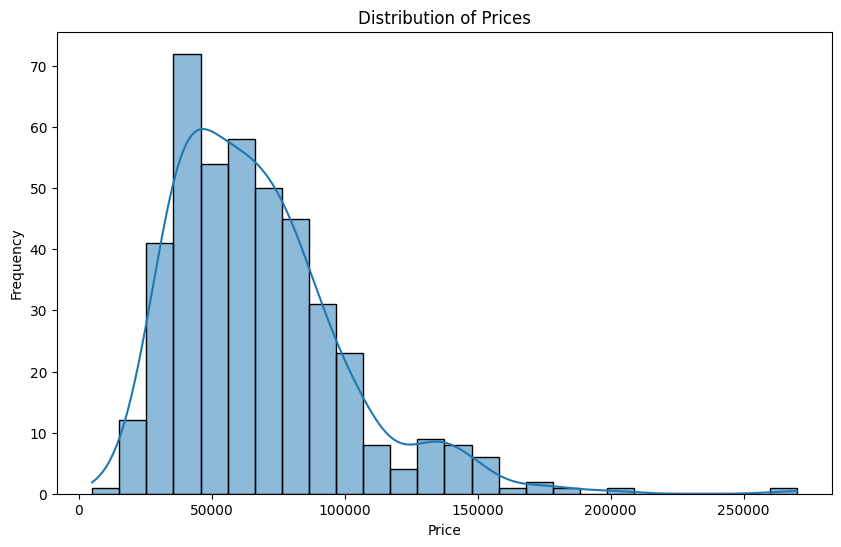

/Users/LukeHeitman/Desktop/getGood/LRD_Predictor/lrd/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


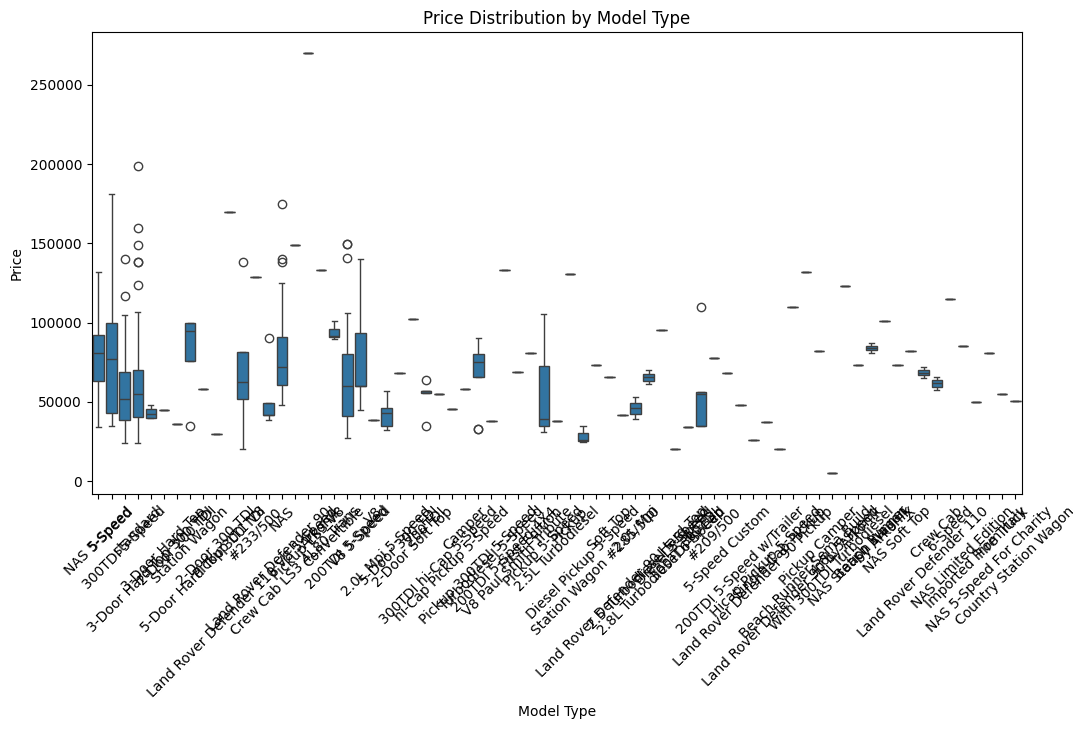

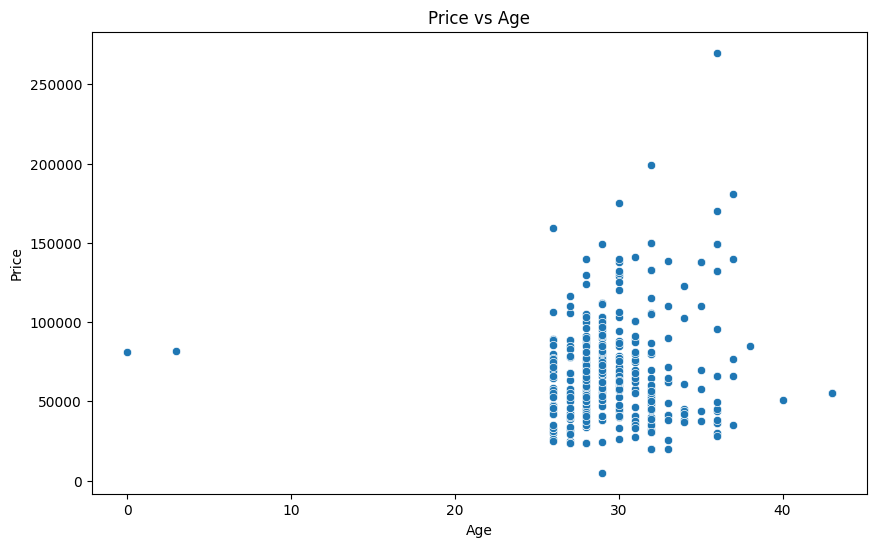

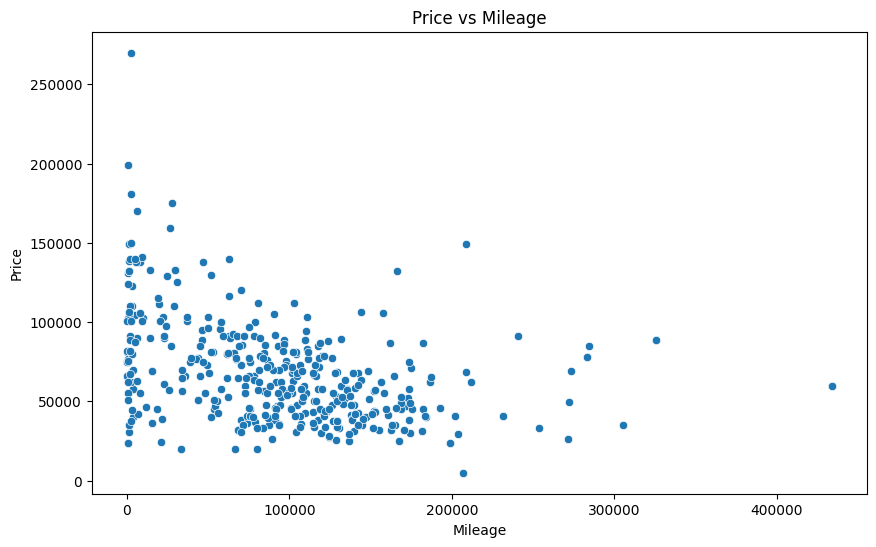

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(defender_data.describe(include='all'))
print(defender_data.info())

# Distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(defender_data['price_final'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#  model type and price
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_type', y='price_final', data=defender_data)
plt.xticks(rotation=45)
plt.title('Price Distribution by Model Type')
plt.xlabel('Model Type')
plt.ylabel('Price')
plt.show()

# Numerical Variable Analysis
# Example: Relationship between 'age' and 'price_final'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price_final', data=defender_data)
plt.title('Price vs Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()
# Numerical Variable Analysis
# Example: Relationship between 'age' and 'price_final'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage_final', y='price_final', data=defender_data)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

A couple of notes:

Age) All trucks are at least 25 y/o, doesnt look like theres any relationship between age and price
Price) Somewhat of a normal dist, some outliters at >150,000
Model) Need to standardize model names, too many names that mean the same things

Also, need to remove NAS trucks as I don't care about those.

TODO:

Standardize model names -->
    Remove NAS types -->

In [5]:
print("Unique Model Names Before Standardization:")
print(defender_data['model_type'].unique())

Unique Model Names Before Standardization:
['NAS 5-Speed' '5-Speed' '300TDI 5-Speed' 'standard'
 '3-Door Hard Top 300 TDI' '3-Door Hard Top' '2-Door 200 TDI'
 'Station Wagon' '5-Door Hard Top 300 TDI' '2-Door 300 TDI'
 'Pickup LT1 V8' 'Land Rover Defender 110 V8 5-Speed' '#233/500'
 'Land Rover Defender 90' 'NAS' 'Crew Cab LS3 4L80 Trans' 'Pickup LS3 V8'
 'Arkonik' 'Convertible' '200TDI 5-Speed' 'V8 5-Speed' 'V8'
 '2.0L Mpi 5-Speed' '5-Door 300 TDI' '2-Door Soft Top' '200TDI'
 '300TDI hi-Cap 5-Speed' 'hi-Cap Pickup 5-Speed' 'Camper'
 'Pickup 300TDI 5-Speed' 'Turbodiesel 5-Speed' '200TDI 5-Speed 4X4'
 'V8 Paul Smith Tribute' 'First Edition' 'Pickup 5-Speed'
 '2.5L Turbodiesel' 'Pickup' 'Diesel Pickup 5-Speed'
 'Station Wagon #285/500' 'Soft Top' 'Land Rover Defender 90 Hard Top'
 '2.0L Mpi' '2.5 Turbodiesel 5-Speed' '2.8L Turbodiesel 6-Speed'
 'Diesel 5-Speed' '300TDI hi-Cap' '300TDI' '#209/500' '5-Speed Custom'
 '200TDI 5-Speed w/Trailer' 'Land Rover Defender 90 Pickup'
 'Hicap Pickup 

In [6]:
defender_data['model_type'].value_counts()

model_type
standard                           84
300TDI 5-Speed                     66
NAS 5-Speed                        57
200TDI 5-Speed                     53
NAS                                30
                                   ..
Pickup                              1
Soft Top                            1
Land Rover Defender 90 Hard Top     1
2.8L Turbodiesel 6-Speed            1
Country Station Wagon               1
Name: count, Length: 71, dtype: int64

In [7]:
defender_data['model_variant_final'].value_counts()

model_variant_final
110 Wagon                  111
90 Soft Top                106
90 Hard Top                 96
90 Wagon                    32
110 Hard Top                20
110 Soft Top                16
130                         16
110 Pickup - Single Cab     13
90 Pickup                    9
110 Pickup - Double Cab      6
127                          2
110                          1
Name: count, dtype: int64

In [8]:
def standardize_model(model):
    model = model.strip().lower()
    # gets rid of special models or nas right away
    if model in ['nas', 'arkonik', 'ls', '#']:
        new_model = 'del'
    elif 'v8' in model:
        new_model= 'v8'
    elif model in ['200tdi','200 tdi']:
        new_model = '200tdi'
    elif model in ['300tdi','300 tdi']:
        new_model = '300tdi'
    elif '2.0' in model:
        new_model = 'gas'
    elif model in ['turbodiesel', 'td']:
        new_model = 'td'
    else:
        new_model = 'standard'
    return new_model

In [9]:
defender_data['model_type_standardized'] = defender_data['model_type'].apply(standardize_model)

In [10]:
defender_data = defender_data[defender_data['model_type_standardized'] != 'del']

/Users/LukeHeitman/Desktop/getGood/LRD_Predictor/lrd/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


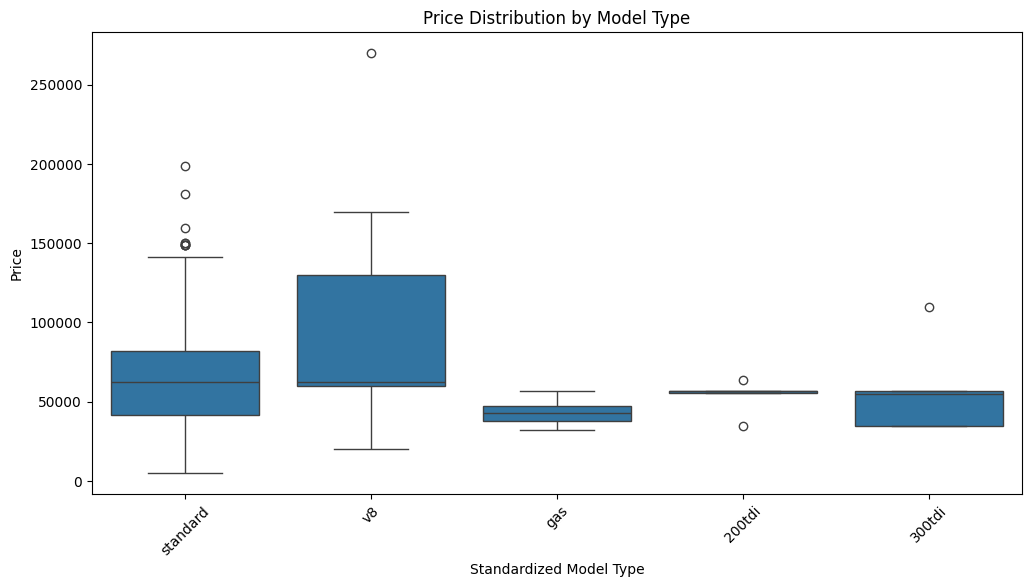

In [11]:
#  now revaluating model type and price relationship
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_type_standardized', y='price_final', data=defender_data)
plt.xticks(rotation=45)
plt.title('Price Distribution by Model Type')
plt.xlabel('Standardized Model Type')
plt.ylabel('Price')
plt.show()

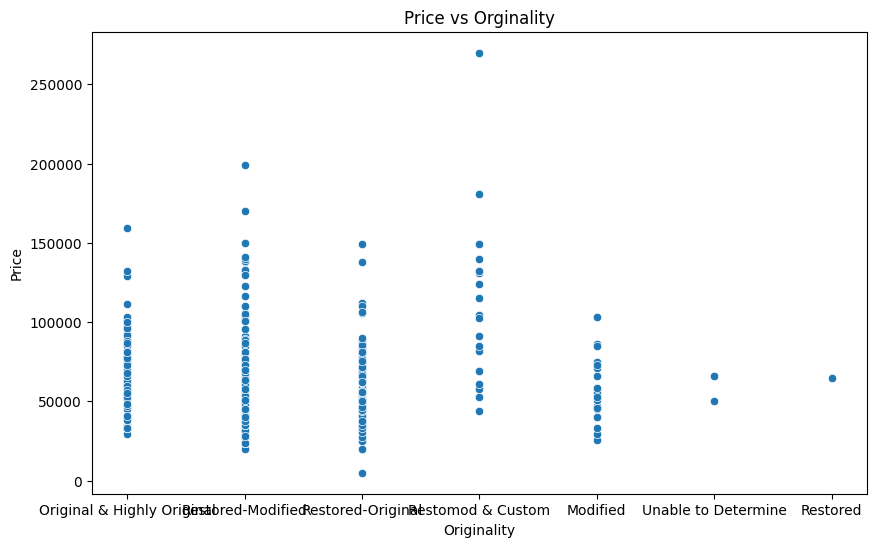

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='originality_final', y='price_final', data=defender_data)
plt.title('Price vs Orginality')
plt.xlabel('Originality')
plt.ylabel('Price')
plt.show()

Trying to find some relationship with age:
Is there a non-linear realtionship w/ price? Could square or cube age to capture
Combine age and mileage, i.e. miles/age 
age and originality

In [13]:
# scoring system with originality
originality_weights = {'Restored-Original': 1.0, 'Restored-Modified': 0.8, 'Original & Highly Original': 1.2, 'Modified': 0.6, 'Other': 0.5}
defender_data['age_originality_score'] = defender_data.apply(lambda x: x['age'] * originality_weights.get(x['originality_final'], 0), axis=1)

In [33]:
print(defender_data[defender_data['age_originality_score'] == 0])

     price_final  mileage_final  age    originality_final  \
21       44000.0       119874.0   36    Restomod & Custom   
33       66000.0          211.0   36  Unable to Determine   
40      148995.0         1297.0   36    Restomod & Custom   
42      269950.0         2334.0   36    Restomod & Custom   
53      104500.0         4985.0   28    Restomod & Custom   
113      58000.0         3728.0   30    Restomod & Custom   
143      66000.0          211.0   36  Unable to Determine   
159      69000.0        15661.0   29    Restomod & Custom   
161      69000.0        15661.0   29    Restomod & Custom   
168     130876.0          500.0   30    Restomod & Custom   
231     148995.0         1297.0   36    Restomod & Custom   
233     148995.0         1297.0   36    Restomod & Custom   
296      61000.0        22991.0   34    Restomod & Custom   
362     181000.0         2700.0   37    Restomod & Custom   
381     132000.0         1000.0   36    Restomod & Custom   
382     132000.0        

In [15]:
# Filtering out rows where age is 0, 3, 38, 40, or 43
defender_data = defender_data[~defender_data['age'].isin([0, 3, 38, 40, 43])]

In [16]:
defender_data['age'].value_counts()

age
28    82
29    64
32    49
27    43
26    37
30    33
31    29
36    19
33    14
34     9
35     7
37     5
Name: count, dtype: int64

Binning mileage

In [17]:
# bin_edges = [0, 50000, 100000, 150000, 200000, max(defender_data['mileage_final'])]
# bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
# defender_data['mileage_bins'] = pd.cut(defender_data['mileage_final'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# # Display the first few rows to verify the new column
# print(defender_data.head())

In [18]:
defender_data['ext_color_final'].value_counts()

ext_color_final
Green            76
White            70
Gray             67
Blue             48
Red              39
Black            32
Yellow           17
Silver           11
Beige            11
Gold/Bronze       8
Orange/Copper     7
Brown             3
Burgundy          1
Multicolor        1
Name: count, dtype: int64

In [19]:
def standardize_colors(color):
    color = color.lower()
    if color in ['gold', 'bronze', 'gold/bronze', 'brown','orange', 'copper', 'orange/copper', 'beige','burgundy']:
        return 'brown_orange_gold'
    elif color in ['multicolor']:
        return 'del'
    else:
        return color

In [20]:
defender_data['color_standardized'] = defender_data['ext_color_final'].apply(standardize_colors)
defender_data = defender_data[defender_data['color_standardized'] != 'del']

In [21]:
defender_data['color_standardized'].value_counts()

color_standardized
green                76
white                70
gray                 67
blue                 48
red                  39
black                32
brown_orange_gold    30
yellow               17
silver               11
Name: count, dtype: int64

In [22]:
defender_data['model_variant_final'].value_counts()

model_variant_final
110 Wagon                  96
90 Hard Top                96
90 Soft Top                91
90 Wagon                   26
110 Hard Top               20
110 Soft Top               16
130                        15
110 Pickup - Single Cab    13
90 Pickup                   9
110 Pickup - Double Cab     6
127                         2
Name: count, dtype: int64

In [23]:
def standardize_model_variant(model_variant):
    model_variant = model_variant.strip().lower()
    if '90' in model_variant:
        if 'pickup' in model_variant:
            return '90 pickup'
        elif 'soft top' in model_variant:
            return '90 soft top'
        else:
            return '90 standard'
    elif '110' in model_variant:
        if 'pickup' in model_variant:
            return '110 pickup'
        elif 'soft top' in model_variant:
            return '110 soft top'
        else:
            return '110 standard'
    else:
        return 'del'

In [24]:
defender_data['variant_standardized'] = defender_data['model_variant_final'].apply(standardize_model_variant)
defender_data = defender_data[defender_data['variant_standardized'] != 'del']

In [25]:
# drop model_type, model_variant_final, ext_color_final
defender_data = defender_data.drop(['model_type', 'model_variant_final', 'ext_color_final'], axis=1)

In [26]:
defender_data

,price_final,mileage_final,age,originality_final,model_type_standardized,age_originality_score,color_standardized,variant_standardized
1,91500.0,63000.0,28,Original & Highly Original,standard,33.6,green,90 soft top
2,88995.0,96934.0,31,Restored-Modified,standard,24.8,blue,110 standard
3,57999.0,173363.0,27,Restored-Original,standard,27.0,blue,110 standard
4,112000.0,103000.0,29,Restored-Original,standard,29.0,black,90 soft top
6,43995.0,152000.0,30,Restored-Original,standard,30.0,white,90 standard
...,...,...,...,...,...,...,...,...
478,81000.0,52000.0,28,Original & Highly Original,standard,33.6,black,90 soft top
479,55000.0,8146.0,31,Original & Highly Original,standard,37.2,red,110 standard
480,75500.0,800.0,30,Restored-Original,standard,30.0,red,110 standard
481,53000.0,132352.0,28,Restomod & Custom,gas,0.0,blue,90 soft top


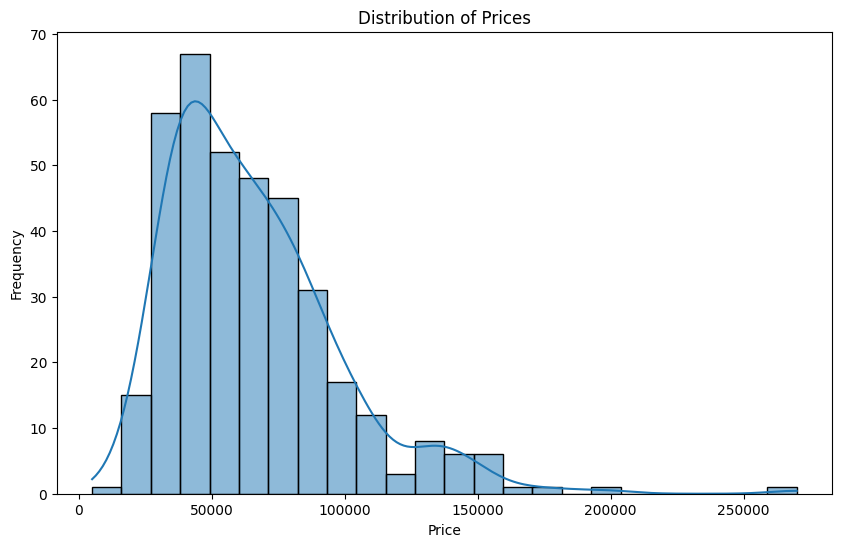

/Users/LukeHeitman/Desktop/getGood/LRD_Predictor/lrd/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


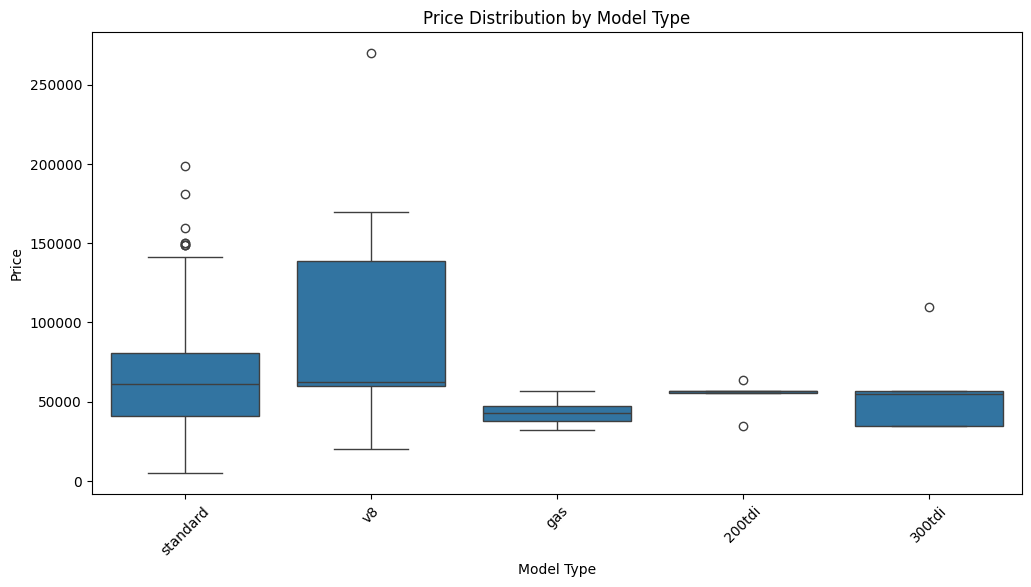

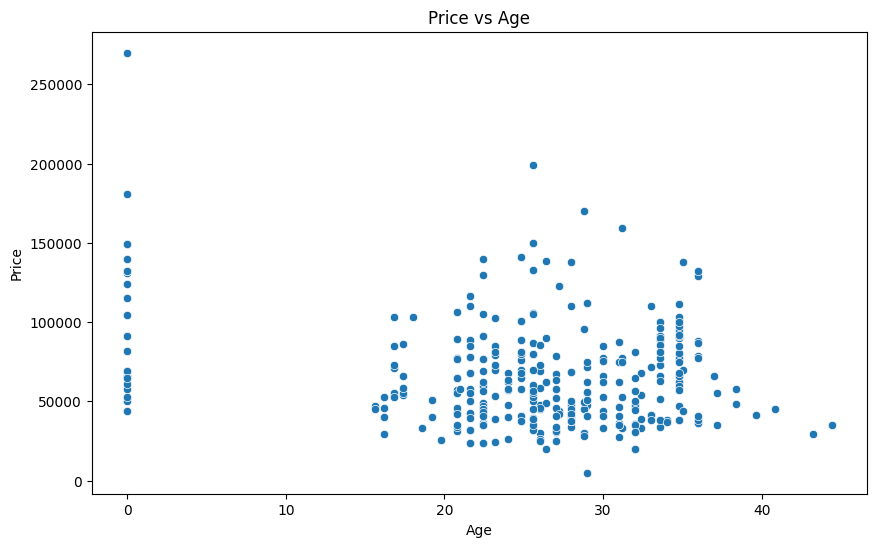

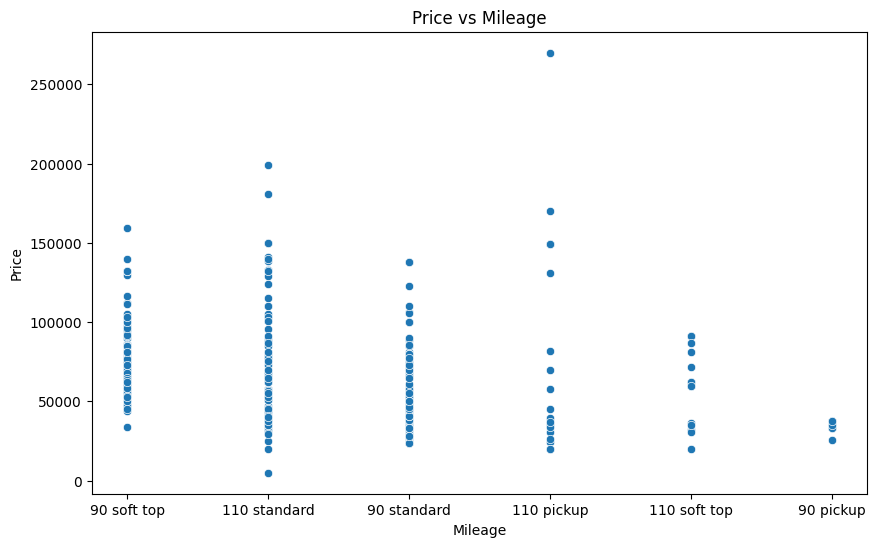

In [28]:
# Distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(defender_data['price_final'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#  model type and price
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_type_standardized', y='price_final', data=defender_data)
plt.xticks(rotation=45)
plt.title('Price Distribution by Model Type')
plt.xlabel('Model Type')
plt.ylabel('Price')
plt.show()

# Numerical Variable Analysis
# Example: Relationship between 'age' and 'price_final'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_originality_score', y='price_final', data=defender_data)
plt.title('Price vs Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()
# Numerical Variable Analysis
# Example: Relationship between 'age' and 'price_final'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='variant_standardized', y='price_final', data=defender_data)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [57]:
# encode non numerical features
defender_data_encoded = pd.get_dummies(defender_data, columns=['originality_final', 'model_type_standardized', 'color_standardized', 'variant_standardized']).astype(int)

   price_final  mileage_final  age  age_originality_score  \
2        88995          96934   31                     24   
3        57999         173363   27                     27   
4       112000         103000   29                     29   
6        43995         152000   30                     30   
7        39999         146786   28                     28   

   originality_final_Modified  originality_final_Original & Highly Original  \
2                           0                                             0   
3                           0                                             0   
4                           0                                             0   
6                           0                                             0   
7                           0                                             0   

   originality_final_Restomod & Custom  originality_final_Restored  \
2                                    0                           0   
3                 

In [63]:
defender_data_encoded.to_csv('cleaned_defender_data.csv', index=False)